In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Cargar datos
df = pd.read_excel('Results.xlsx', sheet_name='Hoja1')
antihorario = df[df['Sentido']  == 'Antihorario']
horario = df[df['Sentido']  == 'Horario']

In [2]:
name = '10 Bits 20kHz'

In [3]:
regresion_1 = LinearRegression()
x_1 = np.array(antihorario['PWM'])
y_1 = antihorario['V Esp32']
regresion_1.fit(x_1.reshape(-1, 1), y_1)
equation_1 = str(round(regresion_1.coef_[0], 3)) +'x + ' + str(round(regresion_1.intercept_, 3))
y_1 = regresion_1.coef_[0]*x_1 + regresion_1.intercept_
print(equation_1)

regresion_2 = LinearRegression()
x_2 = np.array(antihorario['PWM'])
y_2 = np.array(antihorario['V driver'])
c = 0
for i in range(len(y_2) - 1):
    if y_2[i + 1] - y_2[i] >= 1.5:
        c = i + 1
        break

x_2 = np.array(antihorario['PWM'])[:c]
y_2 = np.array(antihorario['V driver'])[:c]
regresion_2.fit(x_2.reshape(-1, 1), y_2)
equation_2 = str(round(regresion_2.coef_[0], 3)) +'x + ' + str(round(regresion_2.intercept_, 3))
y_2 = regresion_2.coef_[0]*x_2 + regresion_2.intercept_
print(equation_2)

regresion_3 = LinearRegression()
x_3 = np.array(antihorario['PWM'])
y_3 = np.array(antihorario['V driver'])

x_3 = np.array(antihorario['PWM'])[c:]
y_3 = np.array(antihorario['V driver'])[c:]
regresion_3.fit(x_3.reshape(-1, 1), y_3)
equation_3 = str(round(regresion_3.coef_[0], 3)) +'x + ' + str(round(regresion_3.intercept_, 3))
y_3 = regresion_3.coef_[0]*x_3 + regresion_3.intercept_
print(equation_3)


0.003x + -0.002
0.002x + -0.157
0.008x + 2.988


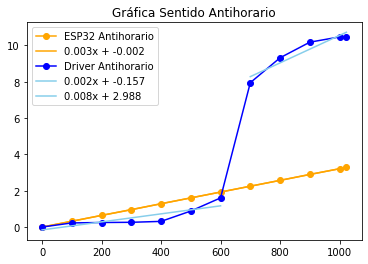

In [4]:
plt.title('Gráfica Sentido Antihorario')
plt.plot(antihorario['PWM'], antihorario['V Esp32'], 'o-', label = 'ESP32 Antihorario', color = 'orange')
plt.plot(x_1, y_1, '-', label = equation_1, color = 'orange')
plt.plot(antihorario['PWM'], antihorario['V driver'], 'o-', label = 'Driver Antihorario', color = 'blue')
plt.plot(x_2, y_2, '-', label = equation_2, color = 'skyblue')
plt.plot(x_3, y_3, '-', label = equation_3, color = 'skyblue')
plt.legend(loc = 'upper left')
plt.savefig(name + " Antihorario.jpg", bbox_inches='tight')

In [5]:
regresion_1 = LinearRegression()
x_1 = np.array(horario['PWM'])
y_1 = np.array(horario['V Esp32'])
regresion_1.fit(x_1.reshape(-1, 1), y_1)
equation_1 = str(round(regresion_1.coef_[0], 3)) +'x + ' + str(round(regresion_1.intercept_, 3))
y_1 = regresion_1.coef_[0]*x_1 + regresion_1.intercept_
print(equation_1)

regresion_2 = LinearRegression()
x_2 = np.array(horario['PWM'])
y_2 = np.array(horario['V driver'])
c = 0
for i in range(len(y_2) - 1):
    if y_2[i + 1] - y_2[i] >= 1.5:
        c = i + 1
        break

x_2 = np.array(horario['PWM'])[:c]
y_2 = np.array(horario['V driver'])[:c]
regresion_2.fit(x_2.reshape(-1, 1), y_2)
equation_2 = str(round(regresion_2.coef_[0], 3)) +'x + ' + str(round(regresion_2.intercept_, 3))
y_2 = regresion_2.coef_[0]*x_2 + regresion_2.intercept_
print(equation_2)

regresion_3 = LinearRegression()
x_3 = np.array(horario['PWM'])
y_3 = np.array(horario['V driver'])

x_3 = np.array(horario['PWM'])[c:]
y_3 = np.array(horario['V driver'])[c:]
regresion_3.fit(x_3.reshape(-1, 1), y_3)
equation_3 = str(round(regresion_3.coef_[0], 3)) +'x + ' + str(round(regresion_3.intercept_, 3))
y_3 = regresion_3.coef_[0]*x_3 + regresion_3.intercept_
print(equation_3)

0.003x + -0.002
0.002x + -0.176
0.008x + 3.008


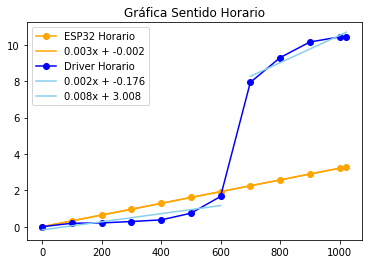

In [6]:
plt.title('Gráfica Sentido Horario')
plt.plot(horario['PWM'], horario['V Esp32'], 'o-', label = 'ESP32 Horario', color = 'orange')
plt.plot(x_1, y_1, '-', label = equation_1, color = 'orange')
plt.plot(horario['PWM'], horario['V driver'], 'o-', label = 'Driver Horario', color = 'blue')
plt.plot(x_2, y_2, '-', label = equation_2, color = 'skyblue')
plt.plot(x_3, y_3, '-', label = equation_3, color = 'skyblue')
plt.legend(loc = 'upper left')
plt.savefig(name + " Horario.jpg", bbox_inches='tight')